# MNIST 데이터에 LeNet-5모델을 적용해 숫자 예측하기

In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# 1. MNIST 데이터셋 임포트

In [36]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [37]:
print(x_train.shape)  # 28*28크기의 이미지가 6만개
print(y_train.shape)
print("\n")
print(x_test.shape)  # 28*28크기의 이미지가 만개
print(y_test.shape)

(60000, 28, 28)
(60000,)


(10000, 28, 28)
(10000,)


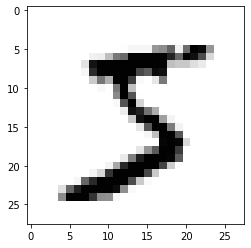

In [38]:
plt.imshow(x_train[0], cmap='Greys')

In [39]:
print(y_test[0])

7


# 2. 데이터 전처리

In [40]:
# 0-255 사이의 픽셀값을 0-1사이로 정규화
# CNN은 0-255 보다 0-1에서 연산이 빠름

x_train, x_test=x_train/255.0, x_test/255.0

In [41]:
# 이미지를 3차원으로 reshape (height=28, width=28, channel=1)
# 흑백이미지는 채널=1

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

In [42]:
# label encoding
# y 라벨을 원핫 인코딩 형식으로 변환

y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

In [43]:
# train, val set split

random_seed=2
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, 
                                                test_size=0.1,
                                                random_state=random_seed)


# 3. CNN model 만들기

In [44]:
# In-> [Conv2D->relu->MaxPool2D]*2-> Flatten-> Dense-> relu-> Dense-> softmax-> Out

model=Sequential()
model.add(Conv2D(filters=20, kernel_size=(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=50, kernel_size=(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))


# 4. 모델 컴파일

In [45]:
optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 5. 모델 훈련

In [47]:
history=model.fit(x_train, y_train, epochs=20, batch_size=20, verbose=1,
                  validation_data=(x_val, y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 137s 3ms/step - loss: 0.1045 - accuracy: 0.9680 - val_loss: 0.0419 - val_accuracy: 0.9875
Epoch 2/20
54000/54000 [==============================] - 141s 3ms/step - loss: 0.0430 - accuracy: 0.9877 - val_loss: 0.0460 - val_accuracy: 0.9868
Epoch 3/20
54000/54000 [==============================] - 164s 3ms/step - loss: 0.0370 - accuracy: 0.9908 - val_loss: 0.0369 - val_accuracy: 0.9895
Epoch 4/20
54000/54000 [==============================] - 164s 3ms/step - loss: 0.0332 - accuracy: 0.9916 - val_loss: 0.0525 - val_accuracy: 0.9883
Epoch 5/20
54000/54000 [==============================] - 159s 3ms/step - loss: 0.0294 - accuracy: 0.9926 - val_loss: 0.0535 - val_accuracy: 0.9905
Epoch 6/20
54000/54000 [==============================] - 141s 3ms/step - loss: 0.0284 - accuracy: 0.9936 - val_loss: 0.0472 - val_accuracy: 0.9898
Epoch 7/20
54000/54000 [==============================] - 124s 

In [48]:
score=model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 3s 312us/step


# 6. 최종 정확도

In [49]:
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

최종 정확도 : 99.12999868392944 %


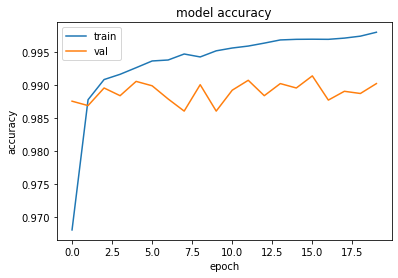

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()